In [27]:
import sys
import prettytable as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

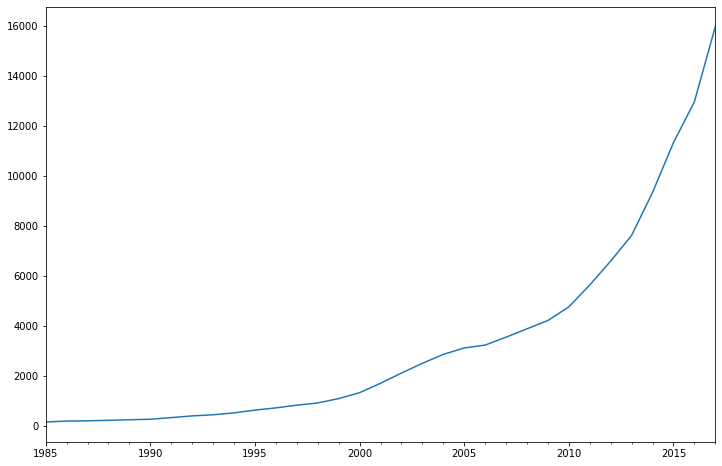

In [28]:
time_series = pd.Series([151.0, 188.46, 199.38, 219.75, 241.55, 262.58, 328.22, 396.26, 442.04, 517.77, 626.52, 717.08, 824.38, 913.38, 1088.39, 1325.83, 1700.92, 2109.38, 2499.77, 2856.47, 3114.02, 3229.29, 3545.39, 3880.53, 4212.82, 4757.45, 5633.24, 6590.19, 7617.47, 9333.4, 11328.92, 12961.1, 15967.61])
time_series.index = pd.Index(sm.tsa.datetools.dates_from_range('1985', '2017'))
time_series.plot(figsize=(12, 8))
plt.show()

In [29]:
# Outlier values are generally moved by the median method
from pandas import rolling_median
# The threshold at which a point is determined to be an exception
threshold = 3
# Parameters from data read
df = pd.DataFrame(data, index=labels)
df['pandas'] = rolling_median(df['u'], window=3, center=True).fillna(method='bfill').fillna(method='ffill')
difference = np.abs(df['u'] - df['pandas'])
outlier_idx = difference > threshold

ImportError: cannot import name 'rolling_median' from 'pandas' (C:\ProgramData\Anaconda3\lib\site-packages\pandas\__init__.py)

In [ ]:
# ADF Inspection
t = sm.tsa.stattools.adfuller(time_series)
output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

In [ ]:
# Uneven data processing
# Logarithmic processing
time_series_log = np.log(time_series)
time_series_log.plot(figsize=(8, 6))
v0 = time_series_log[0]
print(np.exp(time_series_log))
plt.show()
# First-order difference processing
time_series = time_series_log.diff(1)
time_series = time_series.dropna(how=any)
time_series.plot(figsize=(8, 6))
plt.show()

In [ ]:
# Parameters confirm
# Auto confirm pdq parameter by aic and bic statistics

# tb = pt.PrettyTable( ["City name", "Area", "Population", "Annual Rainfall"])
tb = pt.PrettyTable()
tb.field_names = ["自相关系数ACF", "偏相关系数PACF", "模型选择"]
tb.add_row(["拖尾","p阶截尾", "AR(p)"])
tb.add_row(["q阶截尾","拖尾", "MA(q)"])
tb.add_row(["p阶拖尾", "q阶拖尾", "ARMA(p, q)"])
print(tb)

plot_acf(time_series)
plot_pacf(time_series)
plt.show()
# Minimize the optimal parameters by bic
def proper_model(data_ts, maxLag):
    init_bic = sys.maxsize
    init_p = 0
    init_q = 0
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q))
            try:
                results_ARMA = model.fit()
            except:
                continue
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_bic = bic
    return init_bic, init_p, init_q

In [ ]:
# Model fit
b,p,q = proper_model(time_series, 10)
arima_mod = ARMA(time_series, order=(p, 0, q))
arma_mod = ARMA(time_series, order=(p, q))
result_arma = arma_mod.fit()
#$$
# Ljung-Box test is a test of randomness, or a statistical test of whether there is a lag in the time series.
# Determine (diagnose) whether the residual sequence is a white noise sequence to determine the advantages and disadvantages of the model
from statsmodels.stats.diagnostic import acorr_ljungbox
p_value = acorr_ljungbox(result_arma.resid.values.squeeze(), lags=5)
print(p_value)

In [ ]:
# Model prediction
result_arma_pre = result_arma.predict(start='2018', end='2018')
result_arima = arima_mod.fit()
result_arima_pre = result_arima.predict(start='2018', end='2018')
print(result_arma_pre)
print(result_arima_pre)